# Prediction defects with Poisson Distribition


In [1]:
import csv
import numpy as np
import math
import statistics
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('manufacturing_defects.txt', sep='\t',header=None)#The given datasheet was read with the pandas library.
df # table print to see 

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,1,2000,0,0,0,0,0,0,0,1,1,0,0,0,1,0
1,2,2001,2,0,0,0,1,0,0,0,0,0,0,0,1,1
2,3,2002,2,0,0,0,0,0,1,1,0,0,1,0,2,0
3,4,2003,1,2,2,1,1,0,0,0,0,0,1,0,1,0
4,5,2004,0,0,0,1,1,2,2,0,1,0,0,2,1,0
5,6,2005,0,3,2,1,1,1,0,0,0,2,1,4,3,0
6,7,2006,1,0,0,2,1,0,0,1,0,1,0,0,0,0
7,8,2007,1,2,0,0,0,0,1,0,1,1,2,1,4,1
8,9,2008,0,0,1,2,0,1,2,1,0,1,0,3,0,0
9,10,2009,3,0,1,0,0,0,0,1,0,0,2,0,1,1


In [3]:
data = df.values# The data is kept in the array named data. To be array has facilitated the desired operations.

In [4]:
years,columns = data.shape # Two different variables were defined as years and columns. The shape of the data was entered in two variables.

# a)

In [5]:
defects = np.zeros(5)#Created an empty array to hold the cases counts.
for i in range(years):#her vaka sayısını karşılaştırmak için üçlü for döngüsü oluşturuldu.
    for k in range(2,columns):# ilk iki sütunlarda satır sayısı ve yıllar yazdığı için 3.sütundan saymaya başlandı.
          for j in range(5):# her vaka bir defects sayısı ile karşılaştırıldı ve defects e kaydedildi.
                if data[i][k]== j:
                    defects[j] = defects[j]+1

print("# of Defects""\t""# of Cases")                    
for i in range(5):#Sonuçlar bastırıldı.
    print(i,"\t",defects[i])


# of Defects	# of Cases
0 	 144.0
1 	 91.0
2 	 32.0
3 	 11.0
4 	 2.0


In [14]:
196/20


9.8

# b) finding rate parameter

In [6]:
def poison(rate,k):# Poison pmf için bir fonksiyon tanımlandı. 
    poison = (np.exp(-rate))*((rate**k)/math.factorial(k)) # poisson dağılım formülü uygulandı.
    return poison

In [7]:
rate = np.zeros(14) # 14 şirket için de bir rate parameter bulacağımız için 14 elemanlı boş bir dizi oluşturuldu.
total_cases = np.zeros(14) # 14 şirketin 20 yıl boyunca hatalı üretim sayısını tutmak için boş bir dizi oluşturuldu.

#20 yıl boyunca vaka sayılarının toplamı için iki for döngüsü kullanıldı.
for i in range (2,columns): # ilk iki sütunlarda satır sayısı ve yıllar yazdığı için 3.sütundan saymaya başlandı.
    for k in range(years):
        total_cases[i-2] = total_cases[i-2] + data[k][i] # for döngüsü i=2 den başladığı için düzgün sayım için total_cases -2'den başlatıldı.


print("Company""\t""Rate parameter")  

# rate parameter formülünün uygulanması için ikili for döngüsü oluşturuldu.
for i in range(14):#şirket sayısı girildi.
    rate[i]= total_cases[i]/20
    print(i+1,".Company","\t",rate[i]) 
 


Company	Rate parameter
1 .Company 	 0.8
2 .Company 	 0.8
3 .Company 	 0.6
4 .Company 	 0.6
5 .Company 	 0.4
6 .Company 	 0.55
7 .Company 	 0.85
8 .Company 	 0.6
9 .Company 	 0.35
10 .Company 	 0.65
11 .Company 	 0.75
12 .Company 	 1.25
13 .Company 	 1.2
14 .Company 	 0.4


# c) updating tables

In [8]:
prob = np.zeros((14,5))#her şirketin hata olasılığı için boş bir array tanımlandı.
predict_cases = np.zeros((14,5))#Tahminler için boş bir array tanımlandı.
for k in range (5):#tahmin sayısı için for döngüleri
    for i in range(14):
        prob[i][k]= poison(rate[i],k)#her şirket için Poison olasılığı hesaplandı.
        predict_cases[i][k]= prob[i][k]*20 #20 yılda her şirket için her hata için vaka sayısı hesaplandı. 

predicted_defects=np.zeros(5)# tahmini vakaları sayılarını tutmak için bir boş dizi oluşturuldu.

for i in range(5):#şirketlerin vaka sayıları toplandı.
    for k in range(14):
        predicted_defects[i]+=predict_cases[k][i]

#sonuçlar bastırıldı.
print("# of Defects""\t""# of Cases""\t""Predict numbers")        
for i in range(5):
    print(i,"\t ","\t",defects[i],"\t","\t",predicted_defects[i])
    
    
    


# of Defects	# of Cases	Predict numbers
0 	  	 144.0 	 	 143.53794197820304
1 	  	 91.0 	 	 91.66955926945701
2 	  	 32.0 	 	 33.196728895925595
3 	  	 11.0 	 	 9.04307742467245
4 	  	 2.0 	 	 2.0574585216458248


# d) Barplot

Text(0.5, 0, '#of Defects')

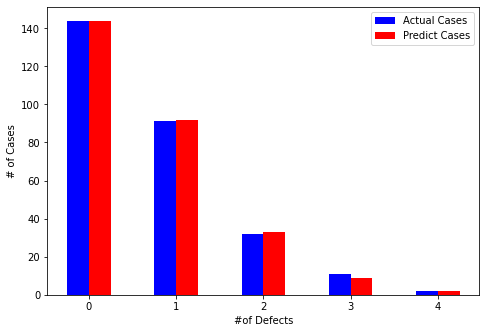

In [9]:
# Barplot çizdirmek için sonuçlar arrayden list yapısına dönüştürüldü.
predict = predicted_defects.tolist()
actual = defects.tolist()


X = np.arange(5) # Defects için bir x ekseni tanımlandı
fig = plt.figure() # yeni figür açıldı
ax = fig.add_axes([0,0,1,1]) # eksenler tanımlandı
ax.bar(X -0.125, actual, color = 'b', width = 0.25) #plotlar çizdirildi.
ax.bar(X + 0.125, predict, color = 'r', width = 0.25)
ax.legend(labels=['Actual Cases', 'Predict Cases']) # labellar tanımlandı.
ax.set_ylabel('# of Cases')#Eksen isimleri tanımlandı.
ax.set_xlabel('#of Defects')



# f) The company prefer to buy a car

In [10]:
# Firma seçimi için 0 hatalı vaka olasılığı en yüksek olan şirketi bulmak lazım.
#bunun için max  komutu kullanabiliriz.
pre = np.zeros(14)
for i in range(14):
    pre[i] = poison(rate[i],0)
max_prob = max(pre)
for i in range(14):
    if pre[i]==max_prob:
        company_no = i+1
print("Sıfır hatalı vaka olasılığı en yüksek olan değer= ",max_prob,"Şirket: ",company_no,".Şirket")

Sıfır hatalı vaka olasılığı en yüksek olan değer=  0.7046880897187134 Şirket:  9 .Şirket


In [1]:
9*39


351

In [2]:
351%11


10